In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
df = pd.read_csv('/Users/isaacshareef/Desktop/Python_Code/Jupyter_notebook/Notebooks/In Progress/Deep Learning Models/All EDR')

In [3]:
df.shape

(96819, 15)

In [4]:
df.head()

,DEPT,BLOCK_HEIGHT,DIFFERENTIAL_PRESSURE,FLOW_IN,FLOW_OUT,HKLD_MAX,PUMP_1,PUMP_2,PUMP_3,ROP,WOB_MAX,RPM,SPP_(EDR),TRQ_MAX,GAMMA_RAY_(MEM)
0,103,93.57,20,504,68.01,70.22,60.0,0.0,60.0,0.0,0.0,64.99,362,0.4,70.62
1,104,93.57,20,504,68.02,70.27,60.0,0.0,60.0,0.0,0.0,64.98,362,0.4,70.58
2,105,93.57,20,504,68.03,70.32,60.0,0.0,60.0,0.0,0.0,64.97,362,0.4,70.55
3,106,93.57,20,504,68.05,70.37,60.0,0.0,60.0,0.0,0.0,64.95,362,0.4,70.51
4,107,93.57,20,504,68.06,70.42,60.0,0.0,60.0,0.0,0.0,64.94,362,0.4,70.48


In [5]:
#renaming certain columns to shorten or correct their text
df1 = df.rename(columns = {'BLOCK_HEIGHT':'BLOCK',
                     'DIFFERENTIAL_PRESSURE':'DIFF_PRESS',
                     'SPP_(EDR)':'SPP',
                     'DEPT':'DEPTH'
                    }
         )

In [6]:
df1

,DEPTH,BLOCK,DIFF_PRESS,FLOW_IN,FLOW_OUT,HKLD_MAX,PUMP_1,PUMP_2,PUMP_3,ROP,WOB_MAX,RPM,SPP,TRQ_MAX,GAMMA_RAY_(MEM)
0,103,93.57,20,504,68.01,70.22,60.0,0.0,60.0,0.00,0.0,64.99,362,0.4,70.62
1,104,93.57,20,504,68.02,70.27,60.0,0.0,60.0,0.00,0.0,64.98,362,0.4,70.58
2,105,93.57,20,504,68.03,70.32,60.0,0.0,60.0,0.00,0.0,64.97,362,0.4,70.55
3,106,93.57,20,504,68.05,70.37,60.0,0.0,60.0,0.00,0.0,64.95,362,0.4,70.51
4,107,93.57,20,504,68.06,70.42,60.0,0.0,60.0,0.00,0.0,64.94,362,0.4,70.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96814,20015,86.58,322,574,59.09,177.35,73.0,72.0,72.0,127.09,34.1,79.91,6228,23.5,-999.25
96815,20016,85.59,322,574,59.11,177.85,73.0,72.0,72.0,71.53,35.8,79.11,6221,25.2,-999.25
96816,20017,84.59,331,574,59.66,174.07,73.0,72.0,72.0,48.75,38.3,80.00,6241,25.0,-999.25
96817,20018,83.59,338,574,59.29,178.45,73.0,72.0,72.0,83.92,36.1,79.29,6266,25.0,-999.25


In [7]:
#dropping columns that I feel do not add value
df2 = df1.drop(columns = ['BLOCK',
               'FLOW_OUT',
               'FLOW_IN',
               'PUMP_1',
               'PUMP_2',
               'PUMP_3',
               'GAMMA_RAY_(MEM)'],
               axis = 1
              )
df2

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
0,103,20,70.22,0.00,0.0,64.99,362,0.4
1,104,20,70.27,0.00,0.0,64.98,362,0.4
2,105,20,70.32,0.00,0.0,64.97,362,0.4
3,106,20,70.37,0.00,0.0,64.95,362,0.4
4,107,20,70.42,0.00,0.0,64.94,362,0.4
...,...,...,...,...,...,...,...,...
96814,20015,322,177.35,127.09,34.1,79.91,6228,23.5
96815,20016,322,177.85,71.53,35.8,79.11,6221,25.2
96816,20017,331,174.07,48.75,38.3,80.00,6241,25.0
96817,20018,338,178.45,83.92,36.1,79.29,6266,25.0


In [8]:
df3 = df2[
    (df2.DEPTH > 0)
    &(df2.ROP < 500)
    &(df2.ROP > 5)
    &(df2.DIFF_PRESS > 0)
    &(df2.TRQ_MAX > 5)
    &(df2.RPM > 2)].reset_index(drop = True)

'''

>12,000 in depth to ensure we are in the lateral with oil based mud
<250 ROP because anything above that is far into outlier territory
>200 Diff Press to rule out negative differential pressures
>10k TRQ to ensure the model is built on a rotating model and to ensure pipe rocking is excluded
>50 RPM in keeping with a rotating model

'''

df3

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
0,197,8,70.28,416.19,0.8,65.00,356,7.9
1,225,3,58.61,337.77,7.5,63.21,369,5.9
2,250,8,60.02,304.36,10.4,63.00,531,6.8
3,254,44,64.27,482.46,6.4,65.87,537,7.7
4,264,44,66.41,484.58,6.3,66.24,547,7.5
...,...,...,...,...,...,...,...,...
84785,20015,322,177.35,127.09,34.1,79.91,6228,23.5
84786,20016,322,177.85,71.53,35.8,79.11,6221,25.2
84787,20017,331,174.07,48.75,38.3,80.00,6241,25.0
84788,20018,338,178.45,83.92,36.1,79.29,6266,25.0


In [9]:
df3.describe()

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
count,84790.000000,84790.000000,84790.000000,84790.000000,84790.000000,84790.000000,84790.000000,84790.000000
mean,10660.058946,417.884692,177.519478,117.832274,32.414423,66.772765,4004.444038,14.924827
std,6086.393473,157.298151,40.171608,80.444249,7.268283,14.854186,1431.095609,4.694058
min,135.000000,1.000000,45.060000,5.050000,0.000000,2.020000,246.000000,5.100000
25%,5440.000000,312.000000,163.542500,60.380000,28.800000,59.080000,2845.000000,11.500000
50%,9850.000000,416.000000,182.370000,95.190000,33.200000,69.480000,3462.000000,14.200000
75%,15955.750000,528.000000,196.850000,146.610000,36.500000,79.400000,5318.000000,18.400000
max,22465.000000,1218.000000,292.550000,499.560000,79.300000,116.050000,6944.000000,28.000000


In [10]:
#popping ROP column to reorder the columns with ROP first
col_to_pop = 'ROP'
first_col = df3.pop(col_to_pop)
df3

,DEPTH,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP,TRQ_MAX
0,197,8,70.28,0.8,65.00,356,7.9
1,225,3,58.61,7.5,63.21,369,5.9
2,250,8,60.02,10.4,63.00,531,6.8
3,254,44,64.27,6.4,65.87,537,7.7
4,264,44,66.41,6.3,66.24,547,7.5
...,...,...,...,...,...,...,...
84785,20015,322,177.35,34.1,79.91,6228,23.5
84786,20016,322,177.85,35.8,79.11,6221,25.2
84787,20017,331,174.07,38.3,80.00,6241,25.0
84788,20018,338,178.45,36.1,79.29,6266,25.0


In [11]:
#inserting ROP to 0 column
df3.insert(0, col_to_pop, first_col)

In [12]:
df3

,ROP,DEPTH,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP,TRQ_MAX
0,416.19,197,8,70.28,0.8,65.00,356,7.9
1,337.77,225,3,58.61,7.5,63.21,369,5.9
2,304.36,250,8,60.02,10.4,63.00,531,6.8
3,482.46,254,44,64.27,6.4,65.87,537,7.7
4,484.58,264,44,66.41,6.3,66.24,547,7.5
...,...,...,...,...,...,...,...,...
84785,127.09,20015,322,177.35,34.1,79.91,6228,23.5
84786,71.53,20016,322,177.85,35.8,79.11,6221,25.2
84787,48.75,20017,331,174.07,38.3,80.00,6241,25.0
84788,83.92,20018,338,178.45,36.1,79.29,6266,25.0


In [17]:
'''
#dropping depth column
df4 = df3.drop(columns = 'DEPTH', axis = 1)
print(df4)
'''

df4 = df3

In [18]:
#defining X and y
X_data = df4[df4.columns[1:7]]
y_target = df4['ROP']

In [19]:
X_data

,DEPTH,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP
0,197,8,70.28,0.8,65.00,356
1,225,3,58.61,7.5,63.21,369
2,250,8,60.02,10.4,63.00,531
3,254,44,64.27,6.4,65.87,537
4,264,44,66.41,6.3,66.24,547
...,...,...,...,...,...,...
84785,20015,322,177.35,34.1,79.91,6228
84786,20016,322,177.85,35.8,79.11,6221
84787,20017,331,174.07,38.3,80.00,6241
84788,20018,338,178.45,36.1,79.29,6266


In [20]:
y_target

0        416.19
1        337.77
2        304.36
3        482.46
4        484.58
          ...  
84785    127.09
84786     71.53
84787     48.75
84788     83.92
84789     37.35
Name: ROP, Length: 84790, dtype: float64

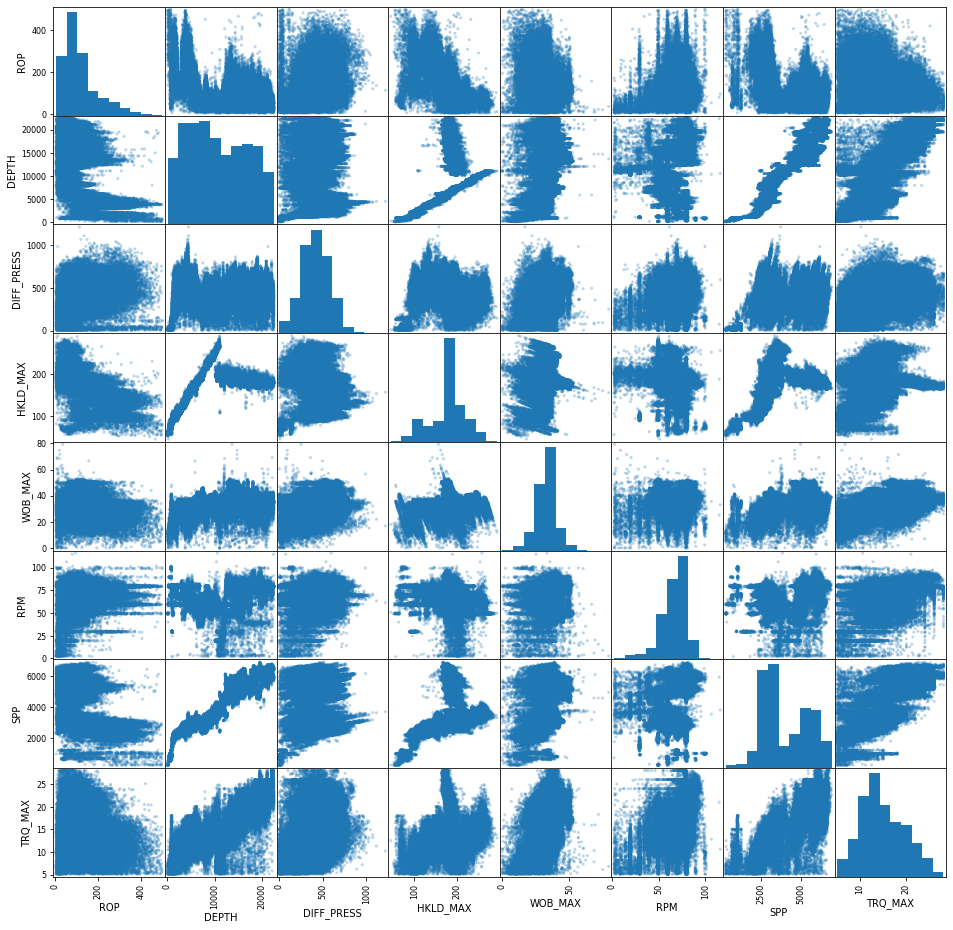

In [21]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = df4.columns
scatter_matrix(df4[attributes], figsize = (16,16), alpha = 0.3)
plt.show()

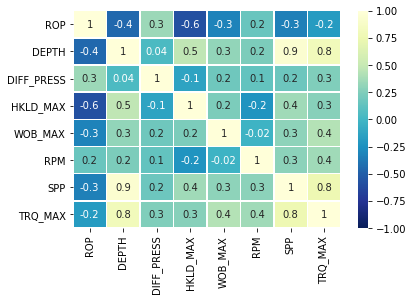

In [22]:
import seaborn as sns
sns.heatmap(df4.corr(),
            annot = True,
            fmt = '.1g',
            vmin = -1,
            vmax = 1,
           linewidth = .5,
           cmap = 
        'YlGnBu_r')

In [23]:
#train test split with polynomial features
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_data, y_target
)

In [24]:
len(X_test)

21198

In [25]:
from sklearn.preprocessing import StandardScaler

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
X_train.shape

(44514, 6)

In [24]:
'''
No need to run this cell.  This is an example of building a model 
in a Sci-Kit Learn Wrapper and will not be used for this project.  
It uses the functionality of Sci-Kit Learn.

#creates the model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs = 300,
             validation_data = (X_valid, y_valid),
callbacks = [keras.callbacks.EarlyStopping(patience = 70)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

'''

'\nNo need to run this cell.  This is an example of building a model \nin a Sci-Kit Learn Wrapper and will not be used for this project.  \nIt uses the functionality of Sci-Kit Learn.\n\n#creates the model\nkeras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)\n\nkeras_reg.fit(X_train, y_train, epochs = 300,\n             validation_data = (X_valid, y_valid),\ncallbacks = [keras.callbacks.EarlyStopping(patience = 70)])\n\nmse_test = keras_reg.score(X_test, y_test)\ny_pred = keras_reg.predict(X_new)\n\n'

In [27]:
#defining the model build function for the scikit learn wrapper
def build_model(
    n_hidden = 3,
    n_neurons = 100,
    learning_rate = 1e-3,
    input_shape = [6,]
               ):
    
    #create the model
    model_tune = keras.models.Sequential()
    
    #create the input layer
    model_tune.add(keras.layers.InputLayer(input_shape = input_shape))
    
    #create the hidden layers
    for layer in range(n_hidden):
        model_tune.add(keras.layers.Dense(n_neurons,
                                          activation = 'relu',
                                          kernel_initializer = 'he_normal'
                                         )
                      )
        
    #create the output layer
    model_tune.add(keras.layers.Dense(1))
    
    #define other parameters
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = tf.keras.losses.Huber(
        delta=.08925,
        reduction="auto",
        name="huber_loss"
    )
        
    #compile the model
    model_tune.compile(
        loss = loss,
        optimizer = optimizer
    )
    
    return model_tune

In [28]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [1,2,3,4],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(1e-3, 1e-2)
}

In [ ]:
#Builds the model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#Executes Randomized Search with CV
rnd_search_cv = RandomizedSearchCV(
    keras_reg,
    param_distribs,
    n_iter = 10,
    cv = 3
)

#Fits the model
rnd_search_cv.fit(X_train, y_train, epochs = 300,
                 validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 50)])

In [30]:
rnd_search_cv.best_params_

{'learning_rate': 0.0013948349251621268, 'n_hidden': 4, 'n_neurons': 49}

In [31]:
# Function to create model, required for KerasRegressor for a grid search
def create_model(input_shape = [6,],
                 optimizer='adam',
                 init='he_normal',
                 n_neurons = 49,
                 n_hidden = 4,
                 learning_rate =  0.0013948349251621268):
    
    # create a sequential model
    model_gridtune = keras.models.Sequential()
    
    # create model layers
    model_gridtune.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model_gridtune.add(keras.layers.Dense(n_neurons,
                                              kernel_initializer=init,
                                              activation='relu'))
    #create model output layer
    model_gridtune.add(keras.layers.Dense(1))
    
    #defining additional parameters
    loss = tf.keras.losses.Huber(delta = 0.08925,
                                reduction = 'auto',
                                name = 'huber_loss')
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    
    # Compile model
    model_gridtune.compile(
        loss=loss,
        optimizer=optimizer
    )
    
    return model_gridtune

####fix random seed for reproducibility
seed = 7
np.random.seed(seed)


In [32]:
from sklearn.model_selection import GridSearchCV

# create model
grid_model =keras.wrappers.scikit_learn.KerasRegressor(
    build_fn=create_model
)


# grid search epochs, batch size, initializers, & optimizers
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'he_normal']
epochs = [300]
#batches = [10, 20, 30]

param_grid = dict(
    optimizer=optimizers,
    epochs=epochs,
    #batch_size=batches,
    init=init
)

grid = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    n_jobs=1,
    cv = 3
)

In [33]:
grid_result = grid.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      callbacks = [keras.callbacks.EarlyStopping(patience = 30)])

Epoch 1/300
928/928 [==============================] - 2s 2ms/step - loss: 3.7639 - val_loss: 3.2391
Epoch 2/300
928/928 [==============================] - 1s 1ms/step - loss: 3.1021 - val_loss: 3.0479
Epoch 3/300
928/928 [==============================] - 1s 1ms/step - loss: 2.9575 - val_loss: 2.9573
Epoch 4/300
928/928 [==============================] - 1s 1ms/step - loss: 2.8740 - val_loss: 2.8380
Epoch 5/300
928/928 [==============================] - 1s 2ms/step - loss: 2.8139 - val_loss: 2.7999
Epoch 6/300
928/928 [==============================] - 1s 1ms/step - loss: 2.7813 - val_loss: 2.7589
Epoch 7/300
928/928 [==============================] - 1s 1ms/step - loss: 2.7262 - val_loss: 2.7335
Epoch 8/300
928/928 [==============================] - 1s 1ms/step - loss: 2.6896 - val_loss: 2.6760
Epoch 9/300
928/928 [==============================] - 1s 1ms/step - loss: 2.6672 - val_loss: 2.6982
Epoch 10/300
928/928 [==============================] - 1s 1ms/step - loss: 2.6316 - val_lo

In [34]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -2.160227 using {'epochs': 300, 'init': 'he_normal', 'optimizer': 'rmsprop'}
-2.180139 (0.023467) with: {'epochs': 300, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
-2.185140 (0.031284) with: {'epochs': 300, 'init': 'glorot_uniform', 'optimizer': 'adam'}
-2.160227 (0.015388) with: {'epochs': 300, 'init': 'he_normal', 'optimizer': 'rmsprop'}
-2.160760 (0.034761) with: {'epochs': 300, 'init': 'he_normal', 'optimizer': 'adam'}


In [77]:
#Model parameters with optimized hyperparameters

# 1 input layer, 3 hidden layers, 91 neurons ea.
input_ = keras.layers.Input(shape = (6,))#22 features with polynomial feats
hidden1 = keras.layers.Dense(91, activation = 'relu', kernel_initializer='he_normal)(input_)
hidden2 = keras.layers.Dense(91, activation = 'relu', kernel_initializer='he_normal')(hidden1)
hidden3 = keras.layers.Dense(91, activation = 'relu', kernel_initializer='he_normal')(hidden2)

# single output layer for continuous variable output
output = keras.layers.Dense(1)(hidden3)
model = keras.Model(inputs = [input_], outputs = [output])

In [78]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1018 (InputLayer)      [(None, 6)]               0         
_________________________________________________________________
dense_3797 (Dense)           (None, 91)                637       
_________________________________________________________________
dense_3798 (Dense)           (None, 91)                8372      
_________________________________________________________________
dense_3799 (Dense)           (None, 91)                8372      
_________________________________________________________________
dense_3800 (Dense)           (None, 1)                 92        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


In [79]:
#description of the layers in memory
model.layers

In [80]:
hidden1 = model.layers[1]

In [81]:
weights, biases = hidden1.get_weights()

In [82]:
weights.shape, biases.shape

((6, 91), (91,))

In [83]:
#compiling the tuned model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0012210780650989215),
              loss = tf.keras.losses.Huber(delta=0.08925,
                                           reduction="auto",
                                           name="huber_loss"),
            )

In [84]:
#callback for early stopping
early_stopping_cb =  keras.callbacks.EarlyStopping(patience = 35)

#callback for checkpoints
checkpoint_cb = keras.callbacks.ModelCheckpoint('/Users/isaacshareef/Desktop/Python_Code\
/Jupyter_Notebook/Notebooks/In progress/PDD_Model.h5',
                                              save_best_only = True)

import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

#tensorboard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [85]:
history = model.fit(X_train, y_train, epochs = 500,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb,
                                checkpoint_cb,
                               tensorboard_cb])

Epoch 1/500
410/410 [==============================] - 1s 2ms/step - loss: 3.4347 - val_loss: 2.5975
Epoch 2/500
410/410 [==============================] - 1s 2ms/step - loss: 2.4807 - val_loss: 2.4783
Epoch 3/500
410/410 [==============================] - 1s 1ms/step - loss: 2.3974 - val_loss: 2.3986
Epoch 4/500
410/410 [==============================] - 1s 1ms/step - loss: 2.3204 - val_loss: 2.3266
Epoch 5/500
410/410 [==============================] - 1s 2ms/step - loss: 2.2493 - val_loss: 2.3069
Epoch 6/500
410/410 [==============================] - 1s 2ms/step - loss: 2.2093 - val_loss: 2.3042
Epoch 7/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1670 - val_loss: 2.1921
Epoch 8/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1385 - val_loss: 2.1925
Epoch 9/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1063 - val_loss: 2.1777
Epoch 10/500
410/410 [==============================] - 1s 2ms/step - loss: 2.0936 - val_lo

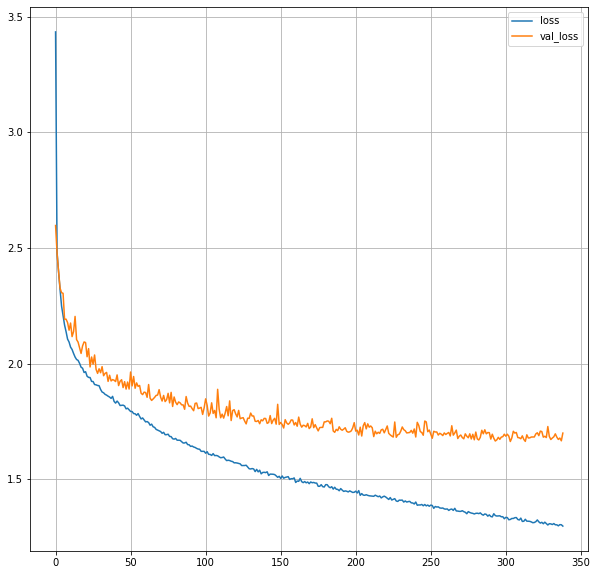

In [86]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (10,10))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [97]:
X_new = X_test[30:40]

In [98]:
y_pred = model.predict(X_new)

In [99]:
y_pred

array([[111.09616 ],
       [163.90306 ],
       [ 85.17725 ],
       [ 81.16785 ],
       [114.635086],
       [133.45937 ],
       [174.21033 ],
       [152.47665 ],
       [ 58.116024],
       [131.49911 ]], dtype=float32)

In [96]:
y_test[30:40]

6004     135.50
16524    207.02
2955      62.77
4396      59.77
19682    102.58
11177    120.29
17390    202.24
6397     228.06
5447      55.42
7348     130.02
Name: ROP, dtype: float64

In [104]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
%tensorboard --'!kill 946'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 946), started 1 day, 13:55:41 ago. (Use '!kill 946' to kill it.)

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT]
                   {serve,dev} ...
tensorboard: error: invalid choice: '--!kill 946' (choose from 'serve', 'dev')

In [105]:
TensorBoard?

Object `TensorBoard` not found.
